# Adult Income Prediction and Data Exploration

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./datasets/AdultIncome/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./datasets/AdultIncome/adult.csv


We upload our dataset

In [6]:
adult_income = pd.read_csv("./datasets/AdultIncome/adult.csv")

We have a quick look at the table:

In [7]:
adult_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


At first sight, the table seems to have null values. The `education.num` and `education` fields are the same, one is categorical and the other is numerical. Let's have a statistical look at the numerical values.

In [8]:
adult_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There might be some outliers in all numerical values. 

In [9]:
adult_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### What do we want to predict?

Our main goal is to predict if a person, given some certain features, has a high salary or not (A salary is considered high if it's above 50,000$ per year). This is contained in the `income` target

### Exploring null values

In [10]:
adult_income = adult_income.replace('?', np.NaN)

In [11]:
adult_income.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

As we observe, `workclass`, `occupation` and `native.country`.

#### workclass

The `workclass` feature is categorical. So we'll replace the null values setting the label `Unknown`.

In [12]:
adult_income['workclass'] = adult_income['workclass'].replace(np.NaN, 'Unknown')

In [13]:
adult_income['workclass'].isna().sum()

0

In [14]:
adult_income[adult_income['workclass'] == 'Unknown']['workclass'].count()

1836

#### occupation

The `occupation` feature is categorical. So we'll replace the null values setting the label `Other`.

In [15]:
adult_income['occupation'] = adult_income['occupation'].replace(np.NaN, 'Other')

In [16]:
adult_income[adult_income['occupation'] == 'Other']['occupation'].count()

1843

#### Native Country

The `native.country` feature is categorical. So we'll also replace the null values setting the label `Other`.

In [17]:
adult_income['native.country'] = adult_income['native.country'].replace(np.NaN, 'Other')

In [18]:
adult_income[adult_income['native.country'] == 'Other']['native.country'].count()

583

Now there are no null values

In [19]:
adult_income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Auxiliar functions

Before analyzing and exploring our dataset, We will create a auxiliar function to plot charts with certain parameters. 

In [20]:
from matplotlib.ticker import FuncFormatter


def plot_features_income(data, column, type_names, size=(20, 10)):
    fig, ax = plt.subplots(figsize=size)
    barWidth = 0.25
    bars1 = list()
    bars2 = list()
    for col in type_names:
        dt = data[data[column] == col]
        count_up = dt[dt['income'] == '>50K']['income'].count()
        count_down = dt[dt['income'] == '<=50K']['income'].count()
        bars1.append(count_up)
        bars2.append(count_down)
    
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1] 
    
    rects1 = plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='More than 50K $')
    rects2 = plt.bar(r2, bars2, color='tomato', width=barWidth, edgecolor='white', label='Less or Equal than 50K $')
    
    plt.xlabel(column, fontweight='bold')
    plt.ylabel('Income per number of people', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], type_names, rotation=30)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    
    heights_1 = list()
    for rect in rects1:
        height = rect.get_height()
        heights_1.append(height)
        
    heights_2 = list()
    for rect in rects2:
        height = rect.get_height()
        heights_2.append(height)
    
    count = 0
    for rect in rects1:
        h1 = heights_1[count]
        h2 = heights_2[count]
        ptg = (h1 / (h1 + h2)) * 100
        ax.text(rect.get_x() + rect.get_width()/2., 0.99*h1,
            '%d' % int(ptg) + "%", ha='center')
        count = count + 1
    
    count = 0
    for rect in rects2:
        h1 = heights_1[count]
        h2 = heights_2[count]
        ptg = (h2 / (h1 + h2)) * 100
        ax.text(rect.get_x() + rect.get_width()/2., h2,
            '%d' % int(ptg) + "%", ha='center', va='bottom')
        count = count + 1    
        
    
    plt.tight_layout()
    plt.legend()
    plt.show()
    

# Data Exploration

In [21]:
adult_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Categorical features

We will first analyze our categorical features.

### workclass

The `workclass` feature represents the kind of profession a person has. Let's see the relation between this feature and the `income` feature.

In [22]:
workclass_types = adult_income.workclass.unique()

In [23]:
workclass_types

array(['Unknown', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay',
       'Never-worked'], dtype=object)

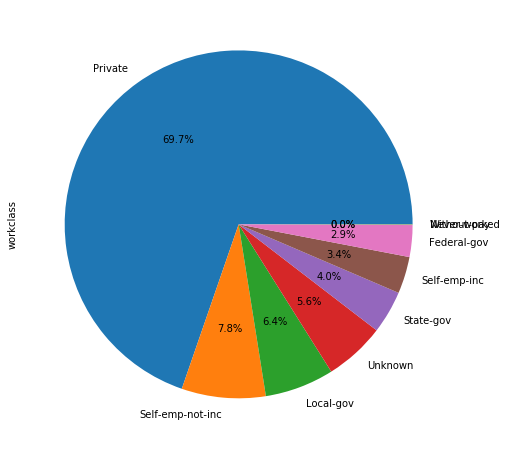

In [24]:
plt.figure(figsize=(8, 8))
adult_income['workclass'].value_counts().plot.pie(autopct='%1.1f%%')

We see that **60%** of people registered in the census work in the private sector. The rest is distribuited among between self-employement and public sector. We have a **5.6%** of jobs that are unknown. Now we we'll have a look at people earning more thatn 50,000$ depending on workclass.

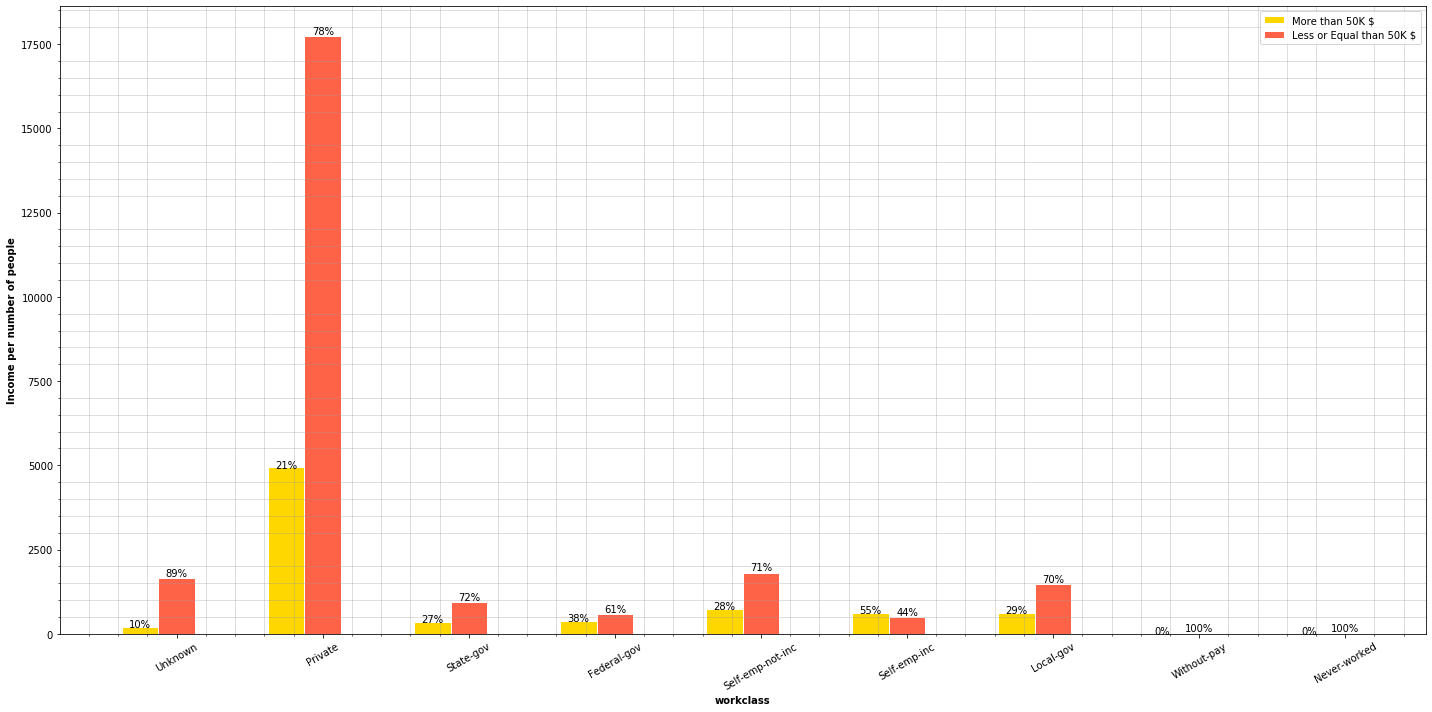

In [25]:

plot_features_income(data=adult_income, column='workclass', type_names=workclass_types)

For every workclass, except self-employement, there are more people earning below 50,000\\$ than people earning more than 50,000\\$. 
Private sector holds most of the jobs, having the majority of them a salary below 50,000$. Now let's have a closer look high paid and non-high paid jobs.

Text(0, 0.5, '')

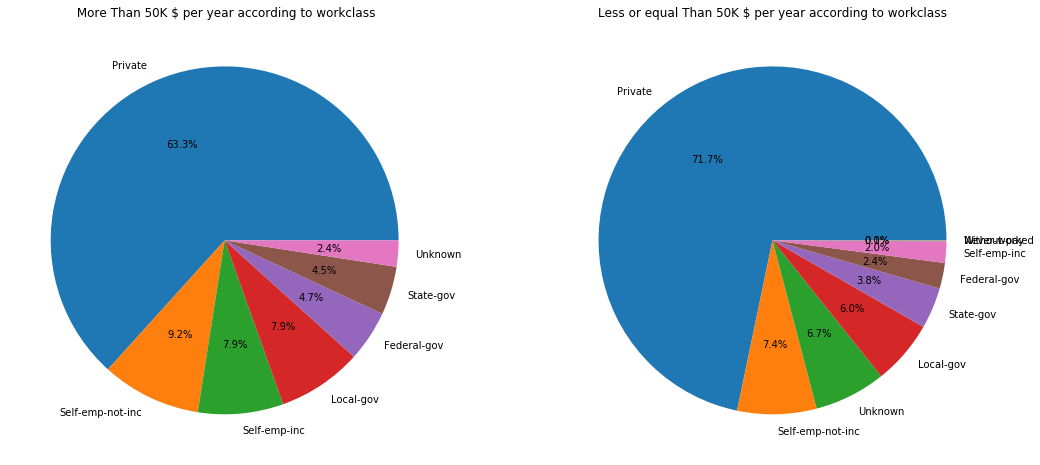

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['workclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title(' More Than 50K $ per year according to workclass')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['workclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to workclass')
ax[1].set_ylabel('')

The observations in the **high salary chart** we draw is:
* 63.3% of high paid jobs can be found in the private sector
* 17.1% are self employed jobs
* 2.4% are Unknown jobs
* The rest are Goverment or civil servant jobs

The observations in the **low salary chart** we draw is:
* Most of the salaries under 50,000$ are in the private sector.
* The rest of percentages are similar to the ones in the high salary sector.

### Education

Let's have a look at the education feature. 

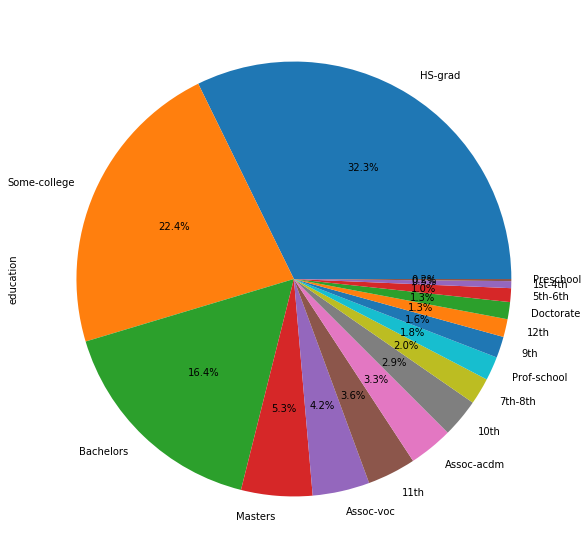

In [27]:
plt.figure(figsize=(10, 10))
adult_income['education'].value_counts().plot.pie(autopct='%1.1f%%')

We see that people's education scale in the census is very distributed.

<Figure size 1440x720 with 0 Axes>

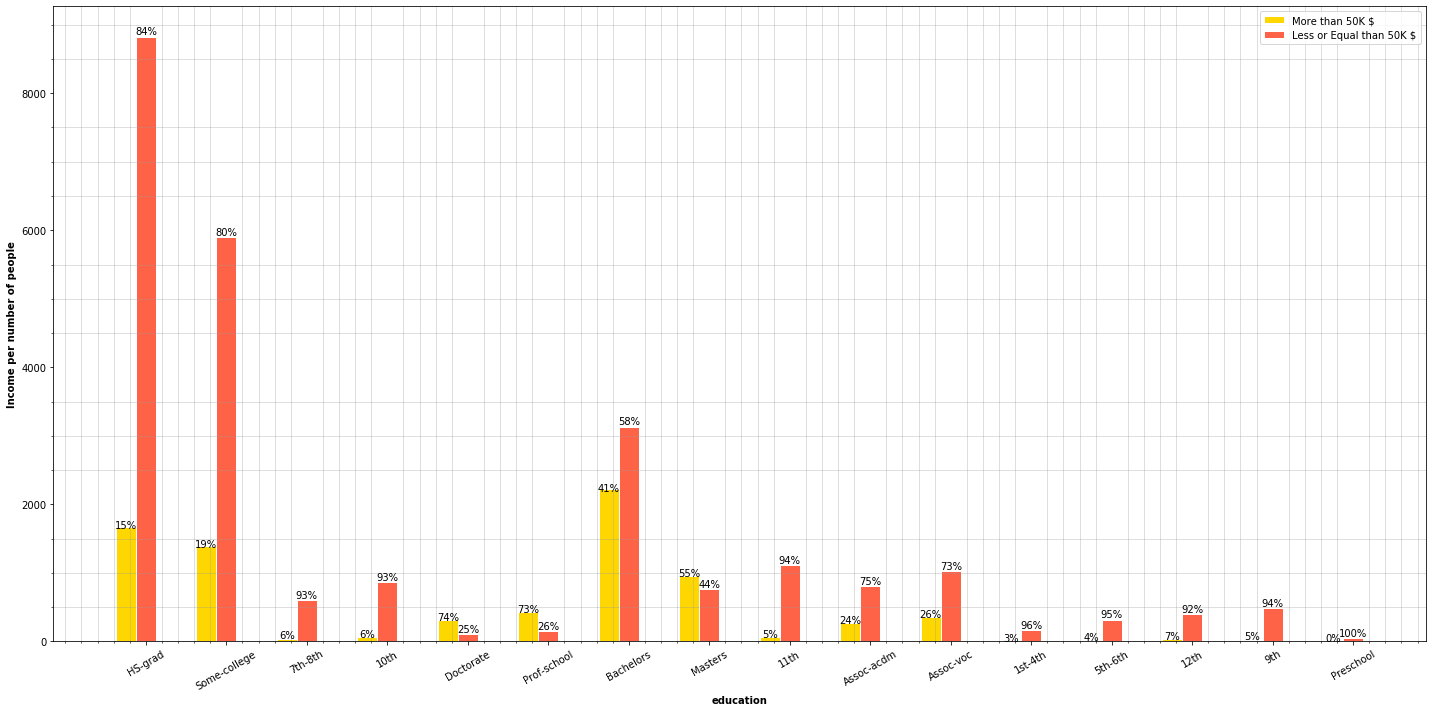

In [28]:
plt.figure(figsize=(20, 10))
education_types = adult_income.education.unique()
plot_features_income(data=adult_income, column='education', type_names=education_types)

The charts plot some expectable information. We can see that most people who are school professors and most people holding a Master degree or a PhD earn more than 50,000\\$ per year. It's interesting that the 41\% of people owning a bachelor's degree tend to earn more than 50,000\\$ a year. The observations we can draw here is that people who went to college and have professional degree tend to earn more than 50,000\\$ per year. 

Now, if we look at the charts below, among people earning more than 50,000\\$ grouped by education we can see that half of the people have, at least, a college degree or are high school graduates (HS-grad). On the other hand, the other pie chart presents a similar distribuition but, as we saw in the previous charts, we can see that people earning a Master degree or a PhD tend to earn more than 50,000\\$.

Text(0, 0.5, '')

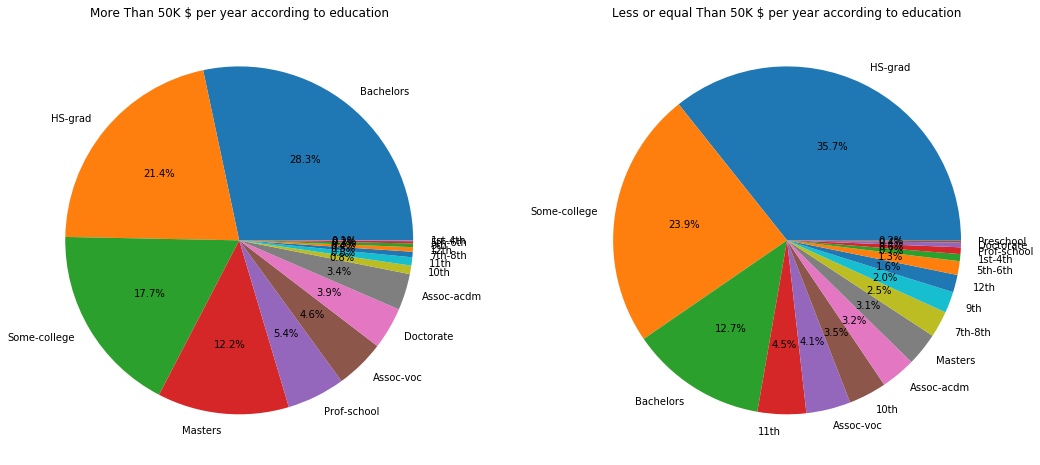

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['education'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to education')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['education'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to education')
ax[1].set_ylabel('')

### Marital status

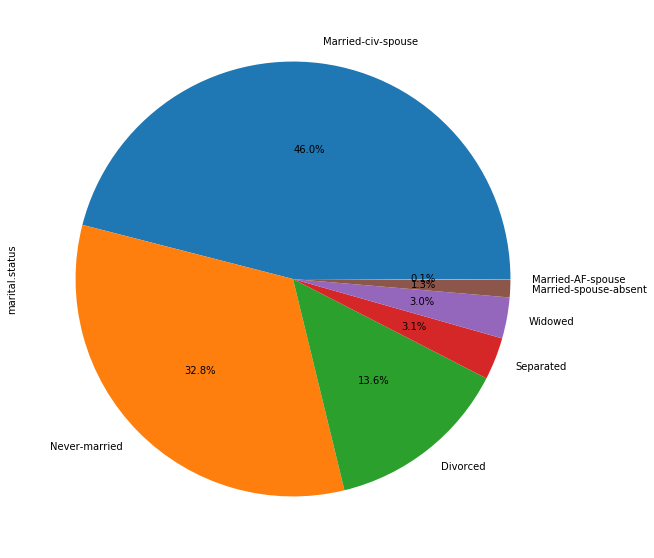

In [30]:
plt.figure(figsize=(10, 10))
adult_income['marital.status'].value_counts().plot.pie(autopct='%1.1f%%')


The 46% of the people in the census are married, the 32% is single and the 13.6% is divorced.

<Figure size 1440x720 with 0 Axes>

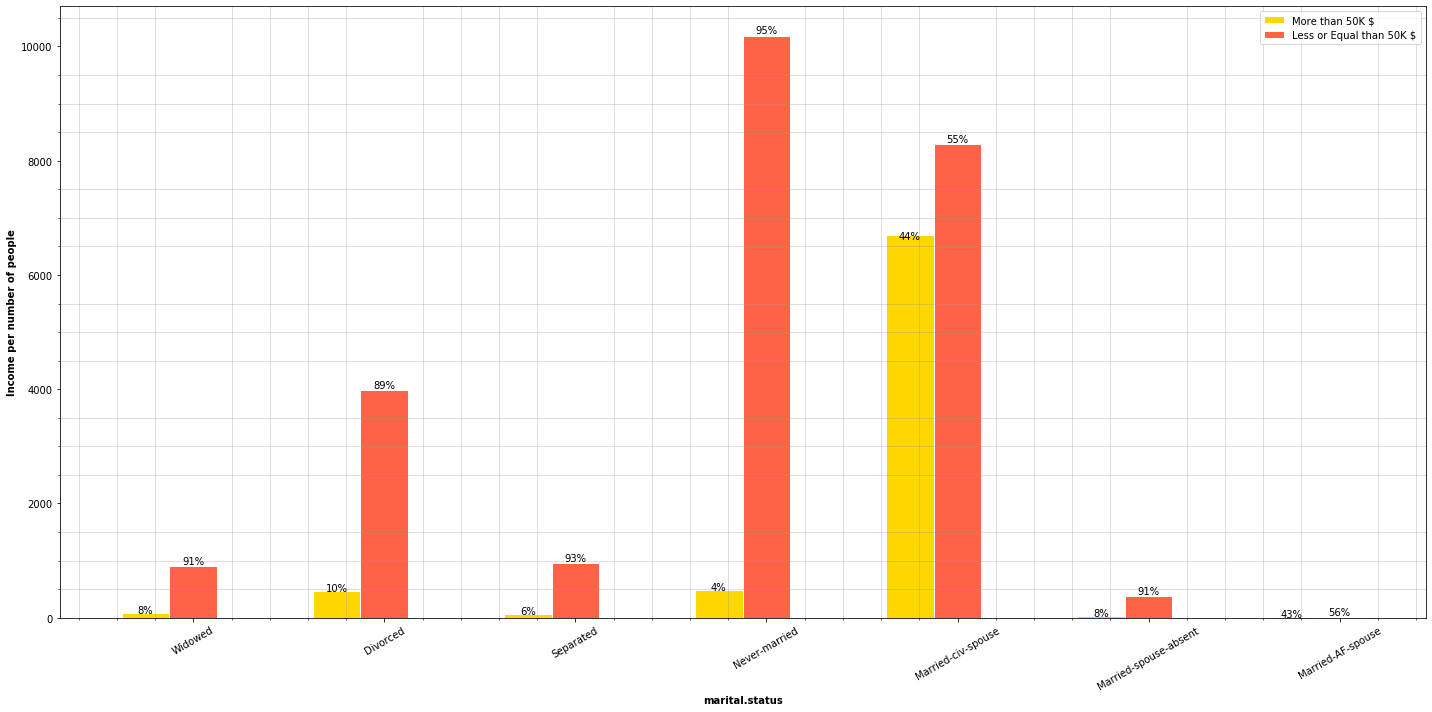

In [31]:
plt.figure(figsize=(20, 10))
marital_types = adult_income['marital.status'].unique()
plot_features_income(data=adult_income, column='marital.status', type_names=marital_types)

This is a very telling chart. As we can see, almost half of people who are married earn more than 50,000\\$, most people who are separated, divorced or single earn less than 50,000\\$. Now let's separate the groups by people who earn more than 50,000\\$ and less than 50,000\\$.

Text(0, 0.5, '')

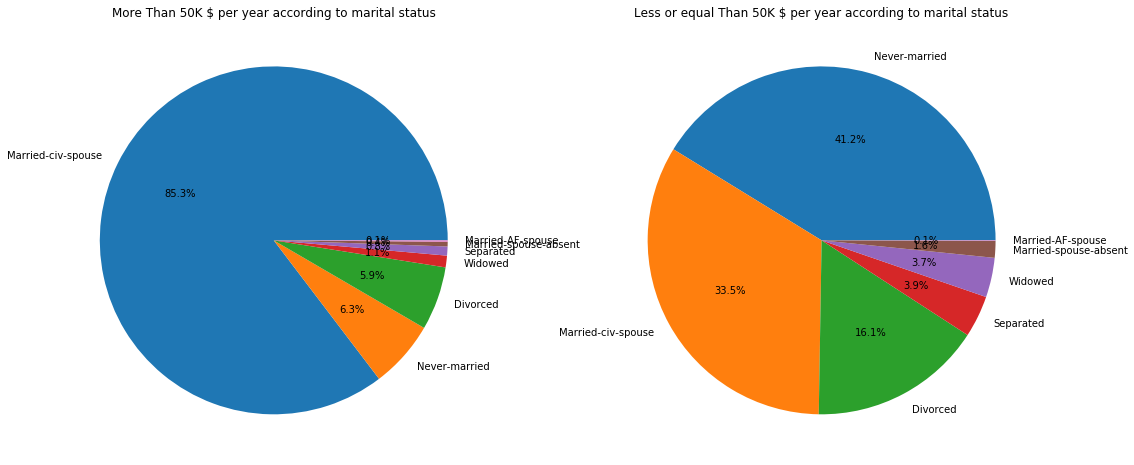

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['marital.status'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to marital status')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['marital.status'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to marital status')
ax[1].set_ylabel('')


Most people earning more than 50,000\\$ are married in a 85%, while they only represent a 33.5% of people earning less than 50,000\\$. A very interesing fact is that people who earn less than 50,000\\$ are either single or divorced, in other words, don't have partner.

### occupation

We are taking a look at what kind of jobs have influence on salaries.

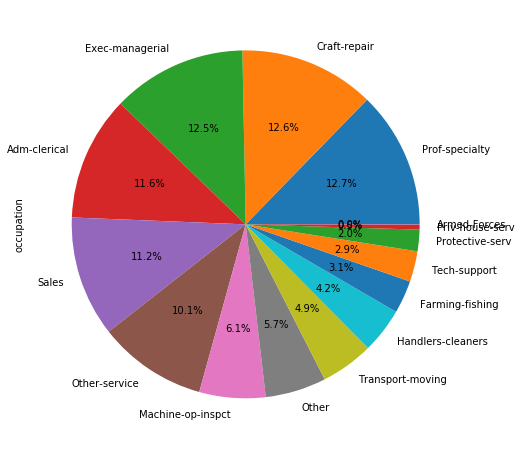

In [33]:
plt.figure(figsize=(8, 8))
adult_income['occupation'].value_counts().plot.pie(autopct='%1.1f%%')

<Figure size 1440x720 with 0 Axes>

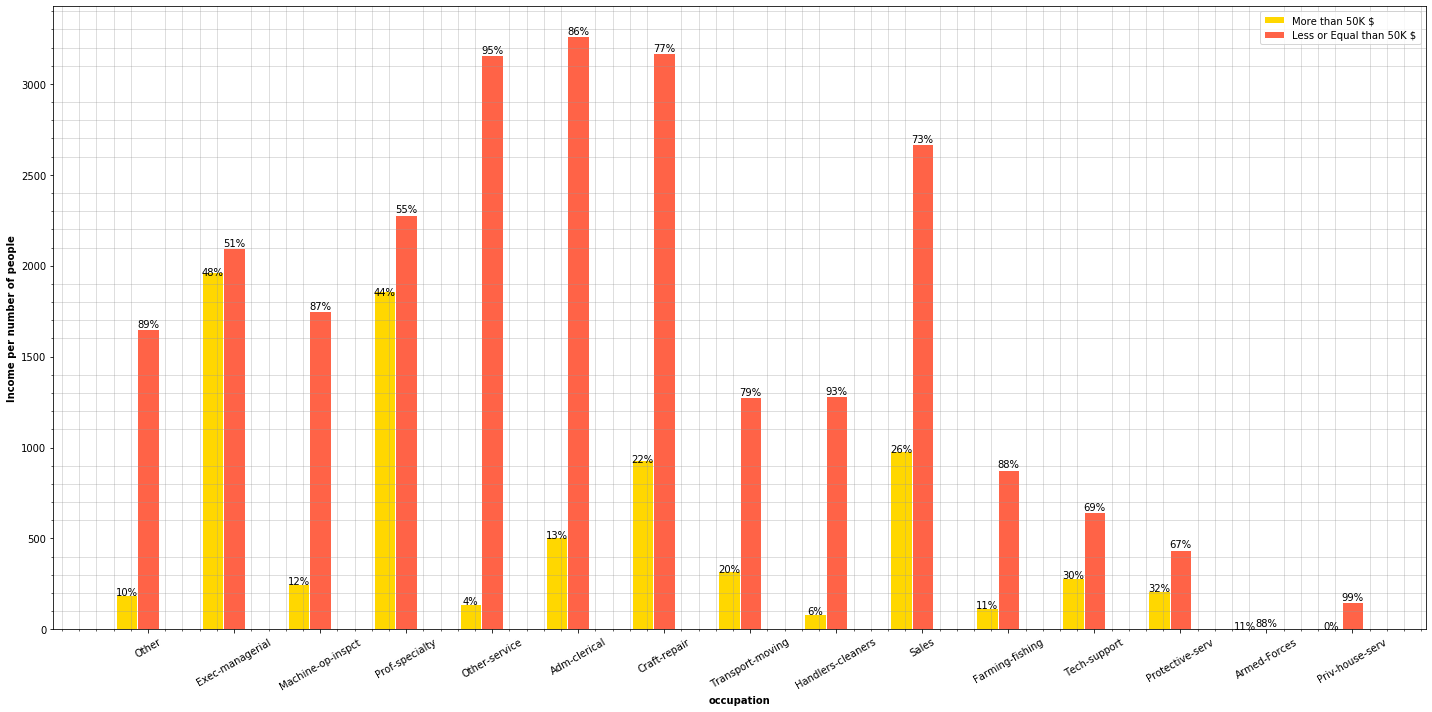

In [34]:
plt.figure(figsize=(20, 10))
occupation_types = adult_income['occupation'].unique()
plot_features_income(data=adult_income, column='occupation', type_names=occupation_types)

Text(0, 0.5, '')

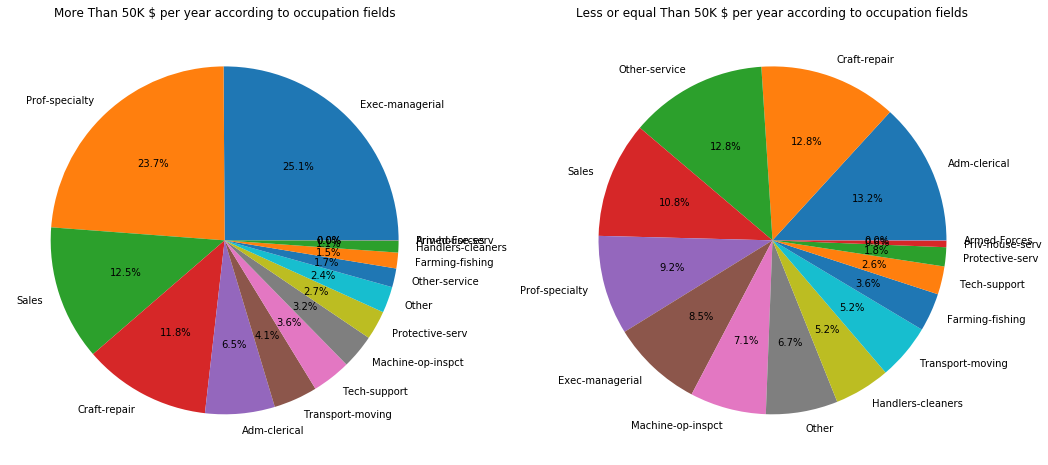

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['occupation'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to occupation fields')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['occupation'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to occupation fields')
ax[1].set_ylabel('')

We can see that most well paid jobs are related to Executive Managers, specialized preoffesors, techology engineers and protection services.

### Relationship

Text(0, 0.5, '')

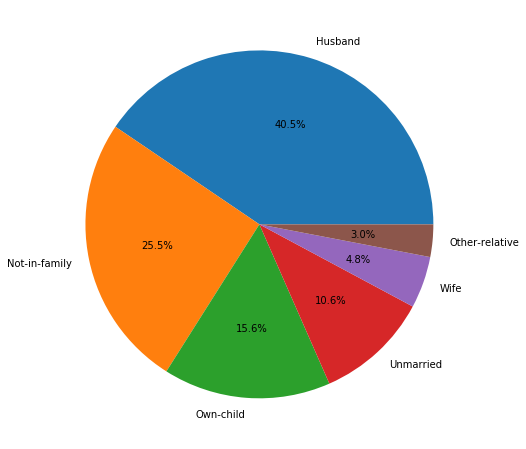

In [36]:
plt.figure(figsize=(8, 8))
adult_income['relationship'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

<Figure size 1440x720 with 0 Axes>

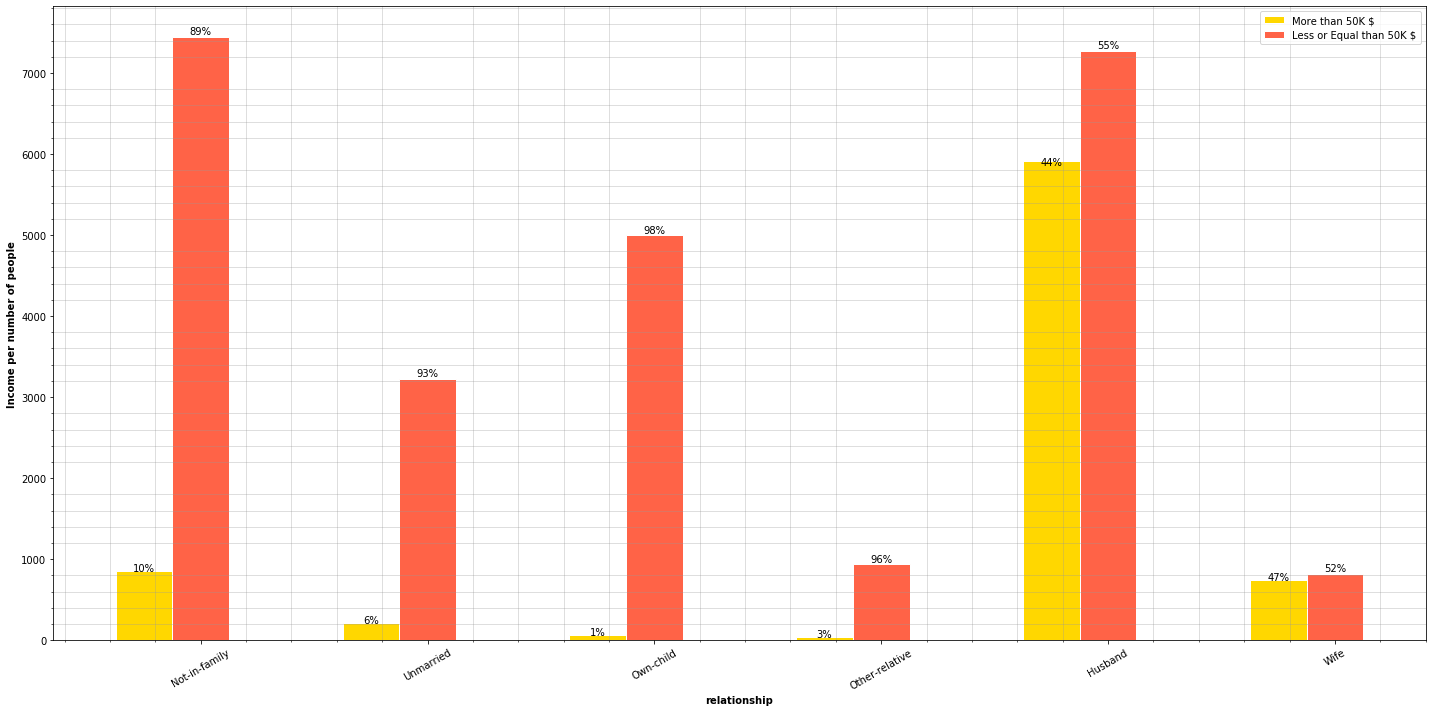

In [37]:
plt.figure(figsize=(20, 10))
relationships_types = adult_income['relationship'].unique()
plot_features_income(data=adult_income, column='relationship', type_names=relationships_types)

An interesting fact is that 44% of people earning more than 50,000\\$ are married men, but it's even more interesting that the percentage of married women earning 50,000\\$ is slightly higher. Let's divide the information by groups of people who earn more and less than 50,000\\$.

Text(0, 0.5, '')

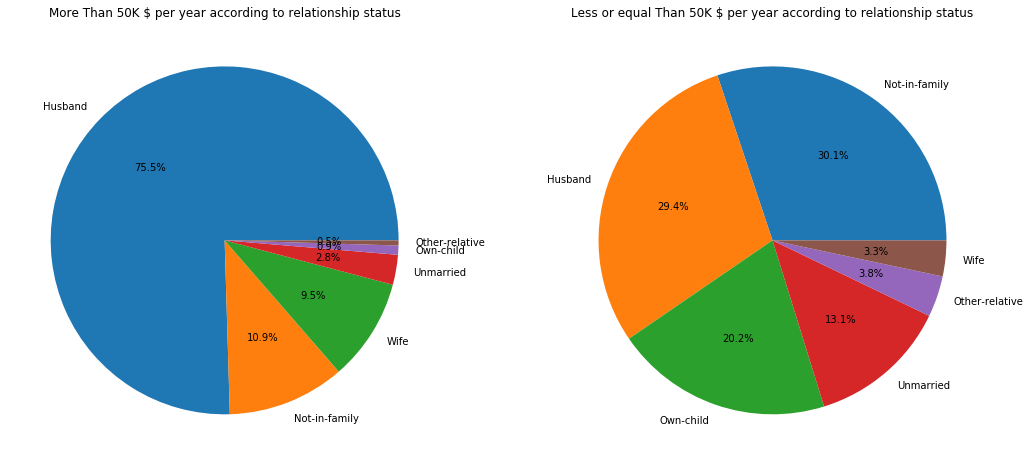

In [38]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['relationship'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to relationship status')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['relationship'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to relationship status')
ax[1].set_ylabel('')

The pie charts show that, in general, most of people earning more than 50,000$ are married men. On the other pie charts the information is much more distribuited.  

### Race

Text(0, 0.5, '')

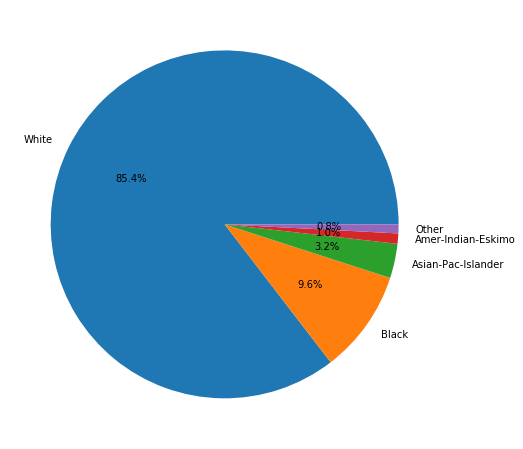

In [39]:
plt.figure(figsize=(8, 8))
adult_income['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

<Figure size 1440x720 with 0 Axes>

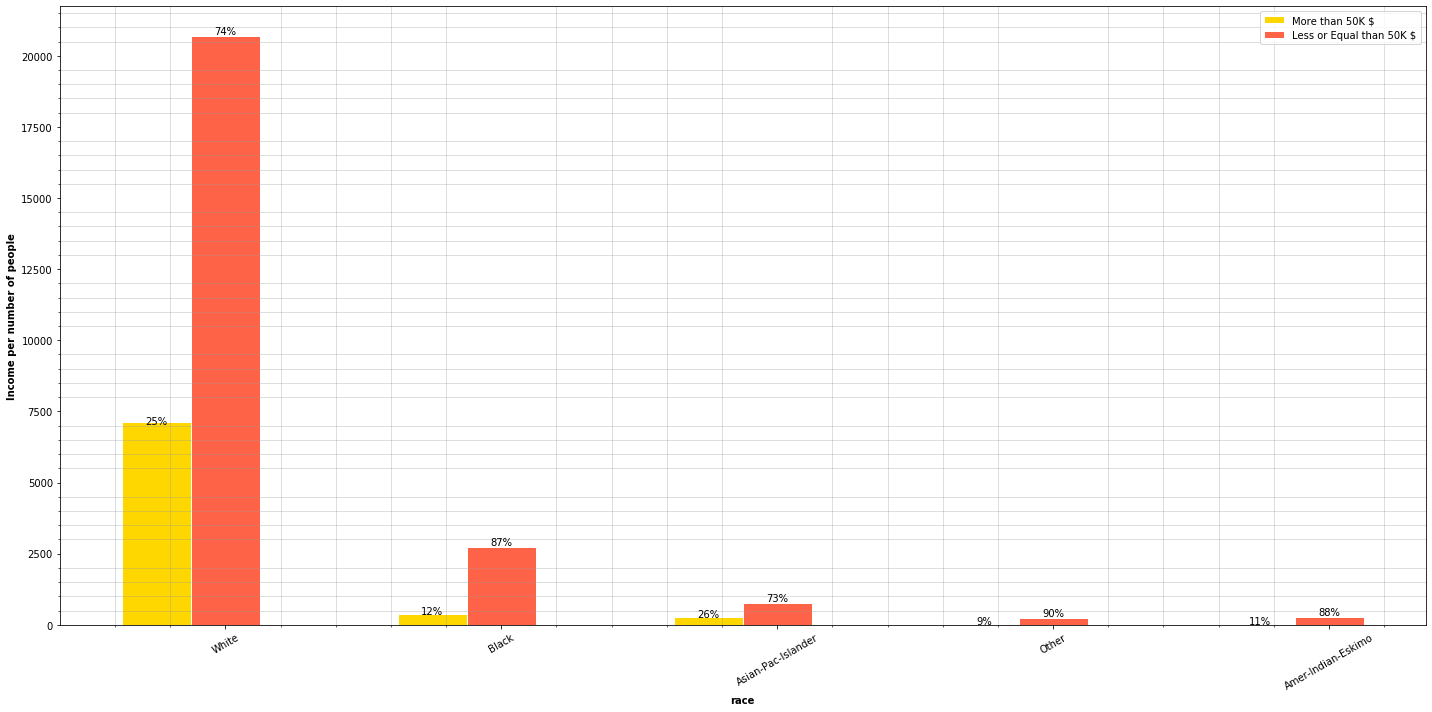

In [40]:
plt.figure(figsize=(20, 10))
race_types = adult_income['race'].unique()
plot_features_income(data=adult_income, column='race', type_names=race_types)

Text(0, 0.5, '')

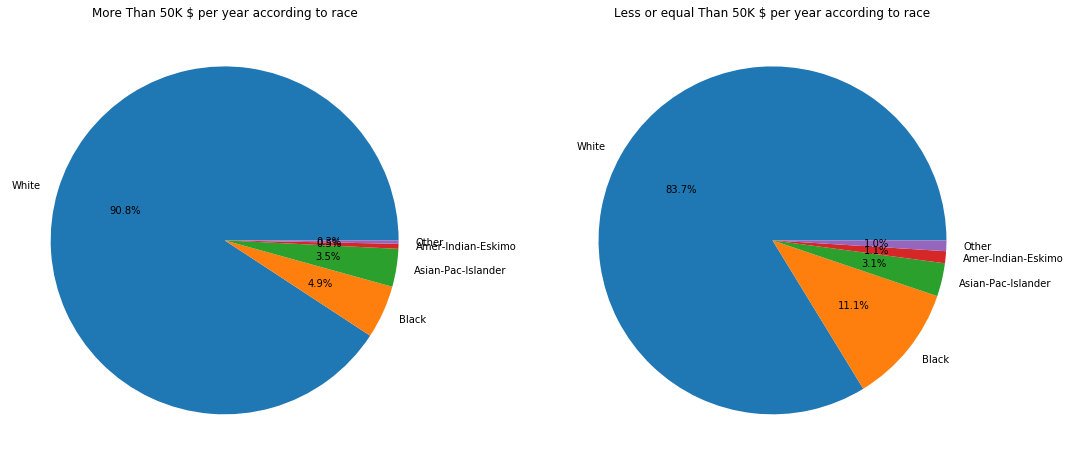

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['race'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to race')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['race'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to race')
ax[1].set_ylabel('')

Statistically, there are more asians and whites earning more than 50,000$ than other races. 

### Sex

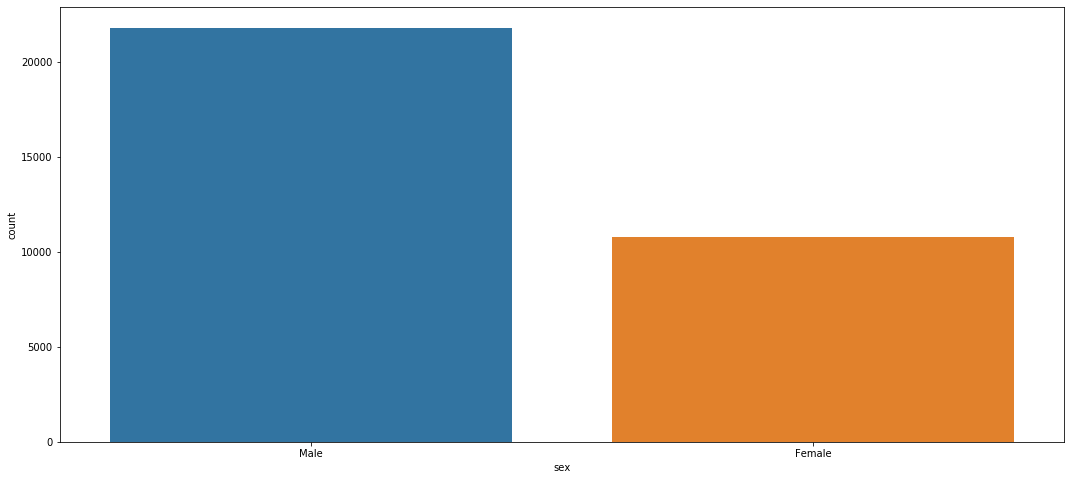

In [42]:
plt.figure(figsize=(18, 8))
sns.countplot(adult_income['sex'], order = ['Male', 'Female'])

The census registers more men than women. 

<Figure size 1440x720 with 0 Axes>

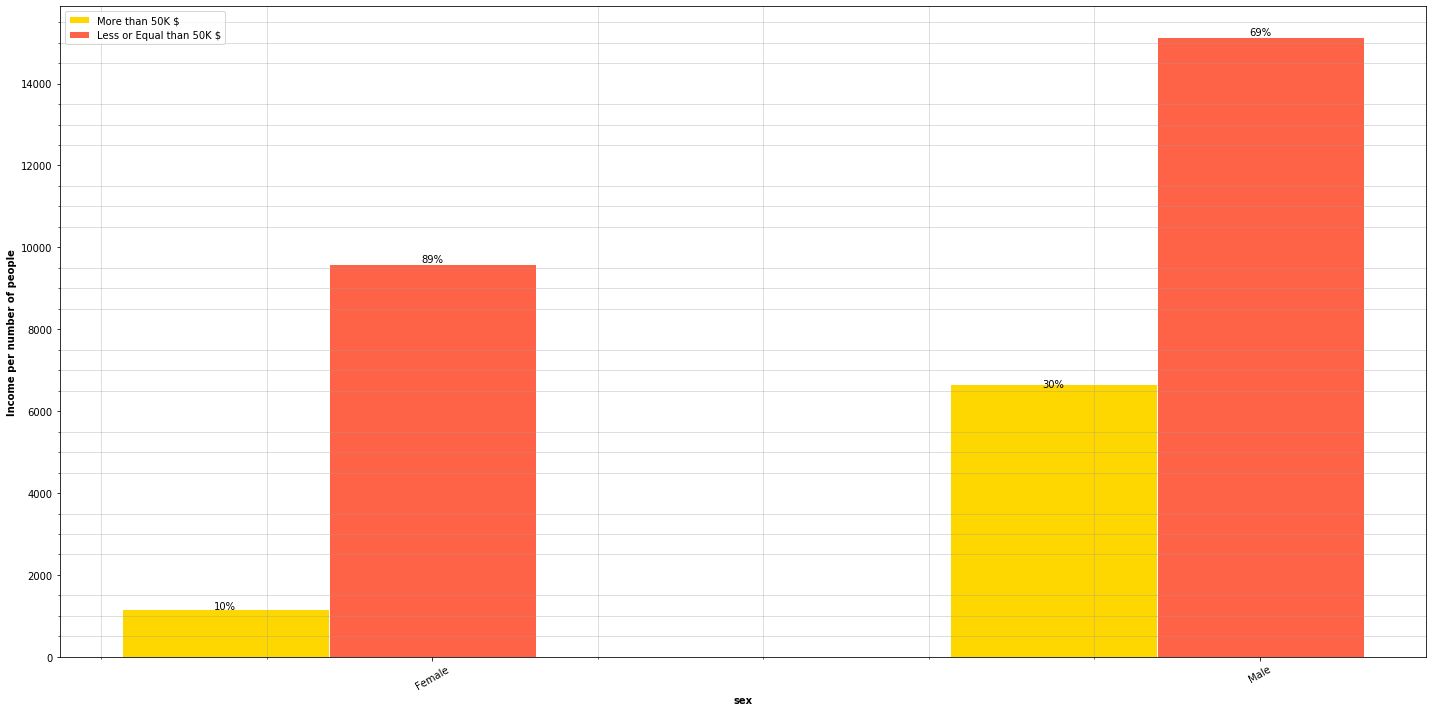

In [43]:
plt.figure(figsize=(20, 10))
race_types = adult_income['sex'].unique()
plot_features_income(data=adult_income, column='sex', type_names=race_types)

The chart show that 30% of men earn more than 50,000\\$ while only 10% of women surpass that amount. In other words, there are 200% more men than women earning above 50,000 \\$.

### Native Country

<Figure size 1440x720 with 0 Axes>

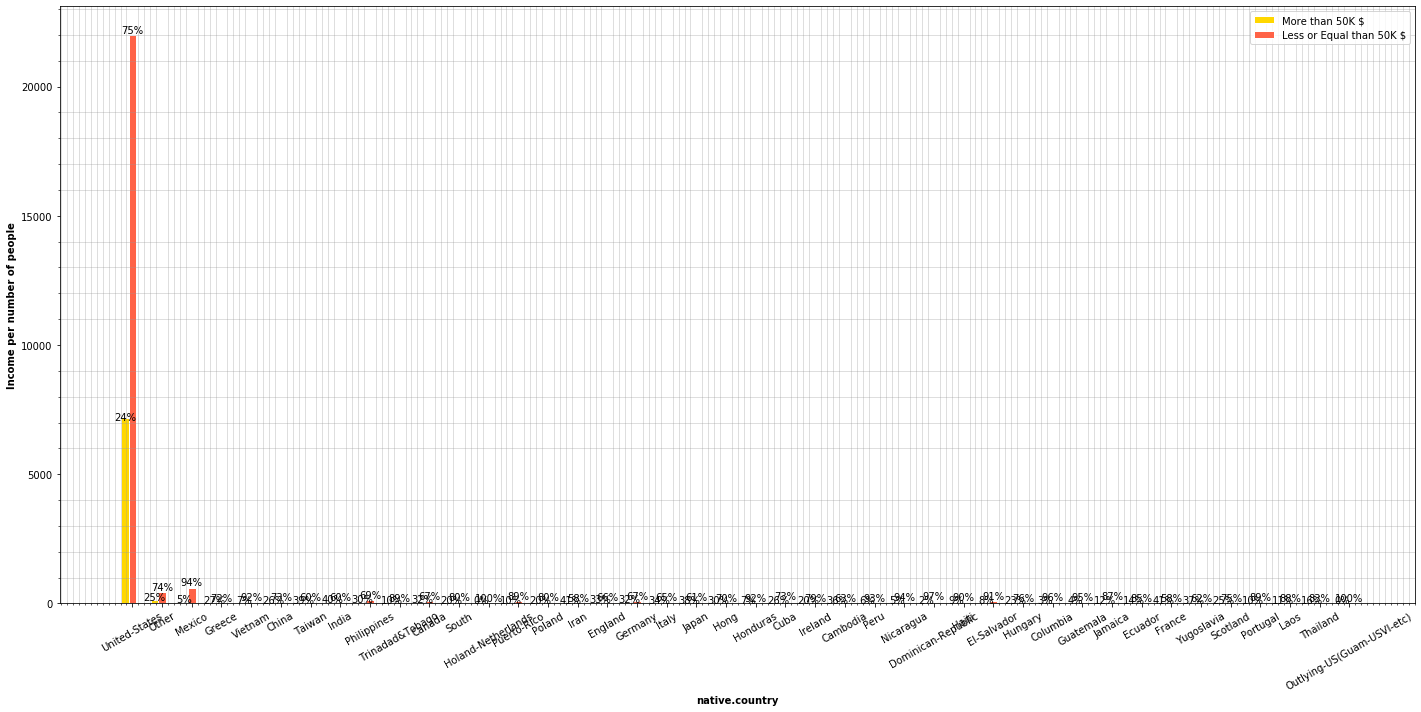

In [44]:
plt.figure(figsize=(20, 10))
country_types = adult_income['native.country'].unique()
plot_features_income(data=adult_income, column='native.country', type_names=country_types)

<Figure size 1440x720 with 0 Axes>

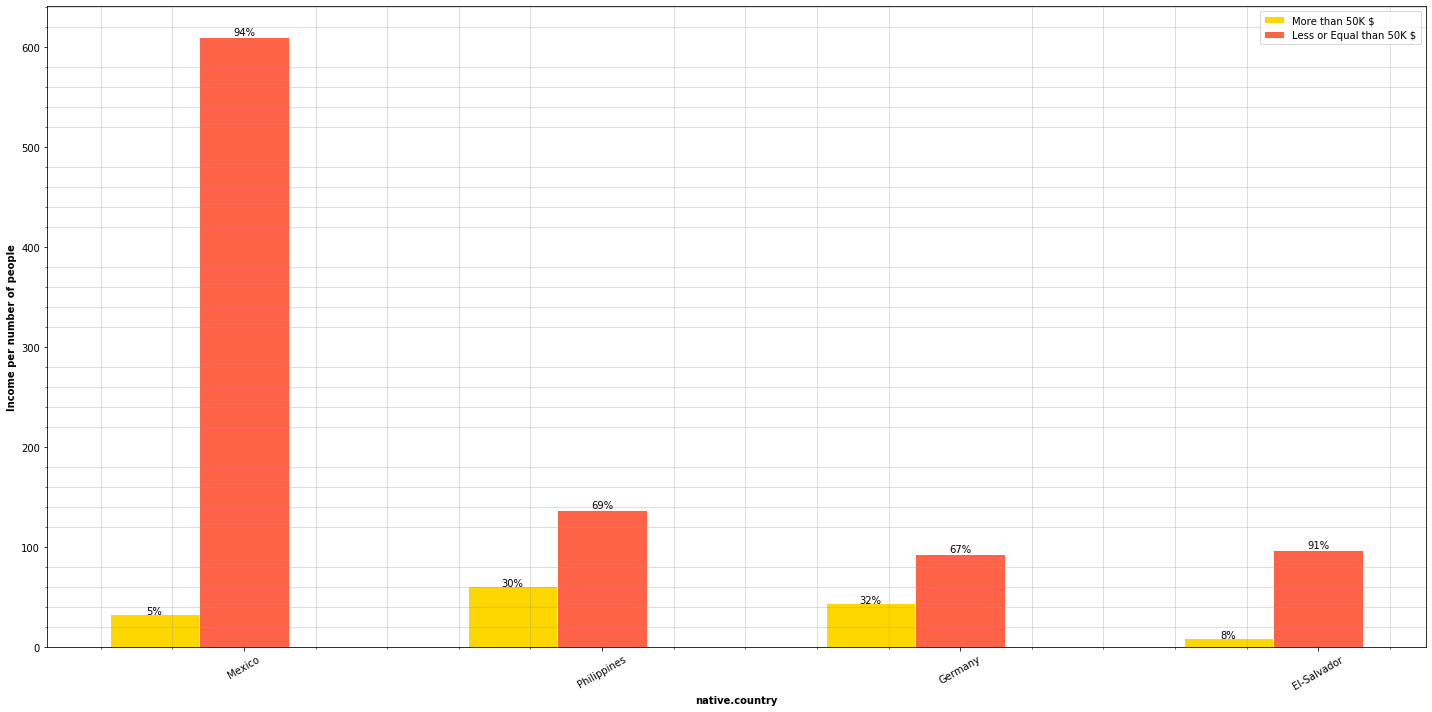

In [45]:
plt.figure(figsize=(20, 10))
country_types = ['Mexico', 'Philippines', 'Germany', 'El-Salvador']
plot_features_income(data=adult_income, column='native.country', type_names=country_types)

Text(0, 0.5, '')

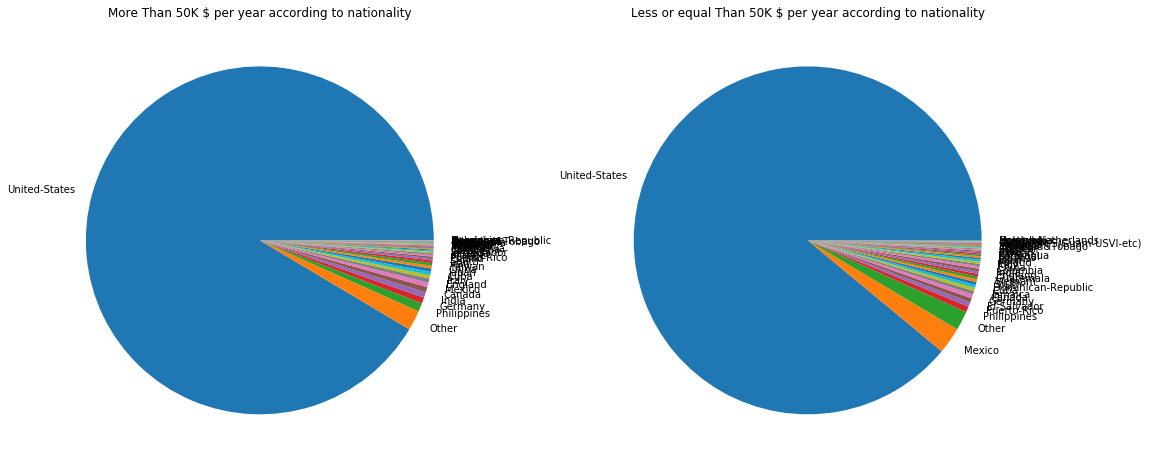

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
adult_income[adult_income['income'] == '>50K']['native.country'].value_counts().plot.pie(autopct='', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to nationality')
ax[0].set_ylabel('')
adult_income[adult_income['income'] == '<=50K']['native.country'].value_counts().plot.pie(autopct='', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to nationality')
ax[1].set_ylabel('')

## Numerical Analysis

### Age

Now we'll take a lot at the age distribuition of the census. 

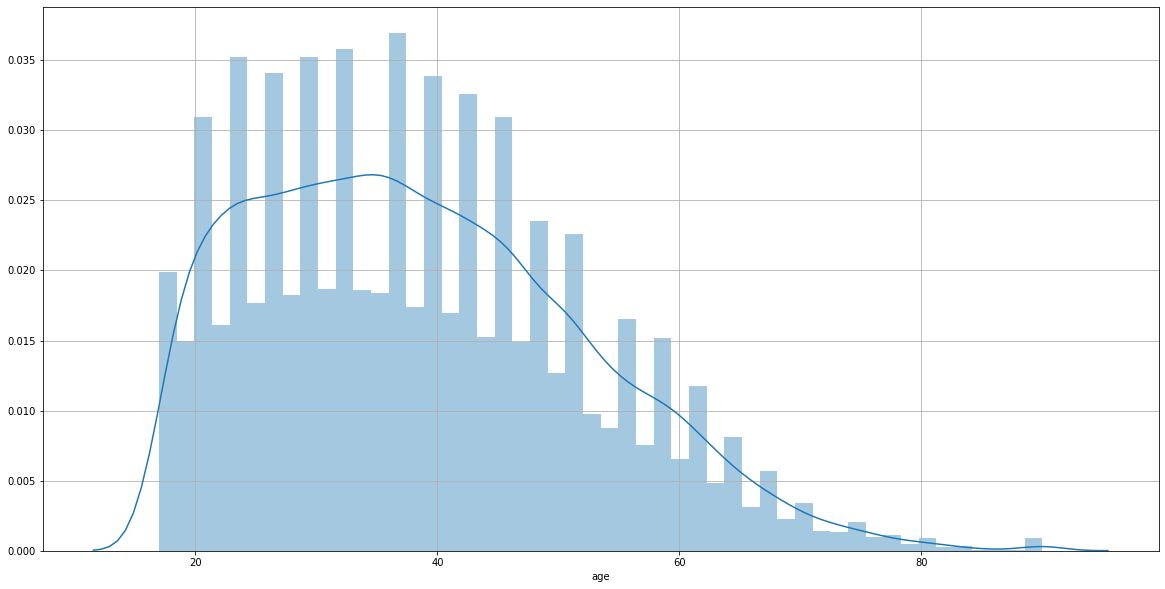

In [47]:
plt.figure(figsize=(20,10))
plt.grid()
sns.distplot(adult_income['age'])

The age distribuition collected in the census is concentrated among from 20 y/o to the 50 y/o interval. 

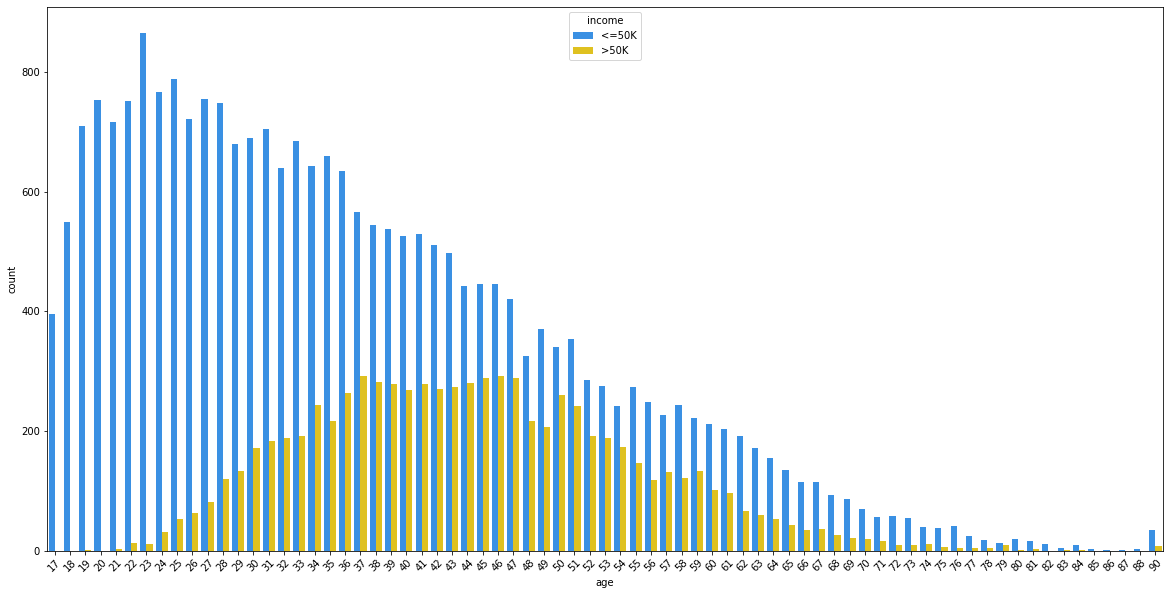

In [48]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.countplot(adult_income['age'], hue=adult_income['income'], palette=['dodgerblue', 'gold'])

This is very interesting plot. As age grows, there are more people earning more than 50,000\\$, so we can say that, generally, income is correllated to age. 

### Hours per week

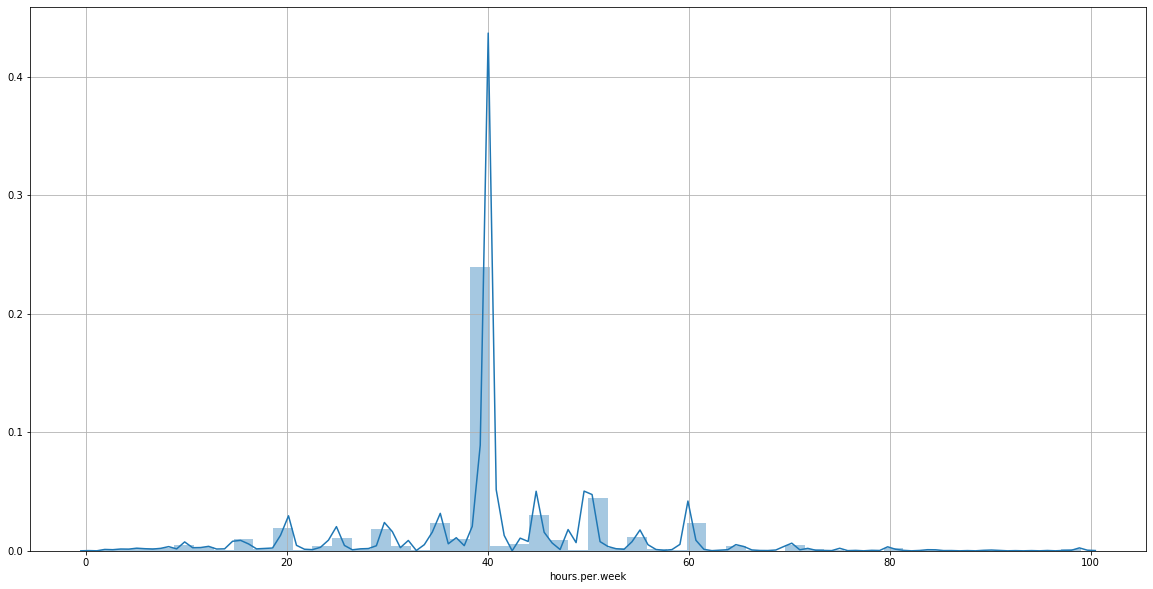

In [49]:
plt.figure(figsize=(20,10))
plt.grid()
sns.distplot(adult_income['hours.per.week'])

The plot shows that most people in the census work 40 hours per week. Now, we'd like to know the hours per week distribuition of the people earning more than 50,000\\$. 

Normally, people who earn more than 50,000\\$ per year have a 40 hours/week rutine. There are also a lot working for 45, 50 and 60 hours/week. 

# Multivariable analysis

After analysing each variable, we will apply a multivariable analysis combining several variables and correlations.

## correlations

In [50]:
numerical_dt = list(adult_income.select_dtypes(include=['float64', 'int64']).columns)

In [51]:
numerical_dt

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [52]:
numerical_dt = np.asarray(numerical_dt)

In [53]:
numerical_dt

array(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'], dtype='<U14')

In [54]:
num_dt = adult_income.loc[:, numerical_dt]

In [55]:
num_dt = num_dt.drop(columns='education.num')

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

NameError: name 'corr_matrix' is not defined

<Figure size 1440x720 with 0 Axes>

The hitmap shows no evident high correlation cases among the numerical variables.

## Analysis based on gender and age

After analyzing each of every feature we realized men to earn more than women, so we decided execute a better analysis on this field, so that we can draw some useful informations.

### Gender and workclass

We're going to have a look at the relations between gender and workclass and occupations, and what kind of jobs women mostly occupy in the census. 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.figure(figsize=(20, 10))
sns.countplot(adult_income['workclass'], hue=adult_income['sex'], ax=axs[1], palette=['pink', 'dodgerblue'], order=adult_income[adult_income['sex'] == 'Female']['workclass'].value_counts().index)
sns.countplot(adult_income['occupation'], hue=adult_income['sex'], ax=axs[0], palette=['pink', 'dodgerblue'], order=adult_income[adult_income['sex'] == 'Female']['occupation'].value_counts().index)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

Most women occupy the jobs related to clerical administration, cleaning services and other services, but jobs related to professor speciality, business and sales, engineering, technology, transport, protection service and primary sector are mostly occupied by men. It's also interesting to see that most gender gap in private sector and self employement is bigger than in other sectors.

### Gender, Hours per week and Income

Let's see if there's any relationship between hours per week and income divided by gender. 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
plt.xticks(rotation=45)
sns.violinplot(adult_income['sex'], adult_income['hours.per.week'], hue=adult_income['income'], palette=['gold', 'dodgerblue'], ax=ax[0])
sns.stripplot(adult_income['sex'], adult_income['hours.per.week'], hue=adult_income['income'], palette=['skyblue', 'tomato'], ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)

The charts show that men work more for hours than women. The left chart show that, regardless of the income, there are more women working for less than men and the men chart is more distribuited above 40 hours per week. The right chart shows that men working more hours tend to earn more than 50,000\\$. We see a concentration of red dots among the 40 and 60 hours/week interval. On the other hand, this concentration doesn't appear women side. Even though the hours per week gap between men and women is not so big, it's clear that there's no correlation between hours per week and income when it comes to women. 

### Age, gender and Hours per week

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.xticks(rotation=45)
sns.lineplot(adult_income['age'], adult_income['hours.per.week'], hue=adult_income['income'], palette=['tomato', 'dodgerblue'], ax=ax[0])
sns.lineplot(adult_income['age'], adult_income['hours.per.week'], hue=adult_income['sex'], palette=['tomato', 'dodgerblue'], ax=ax[1])
ax[0].grid(True)
ax[0].title.set_text("Age and Hours per week divided by Income")
ax[1].grid(True)
ax[0].title.set_text("Age and Hours per week divided by Gender")

We see a very interesting trend in chart above. Let's take a loot at the left chart first. As the age grows, there are more people earning more than 50,000\\$ but work for more hours. In both cases, as age reaches the 60 year old, people tend to work for less hours but the number of people earning more than 50K increases. What's funny is that people who earn a lot start working for more hours when as they start turning 80.

The right chart shows very similar line paths. Men tend work for more hours than women, but as they get closer the standard retirement age, men and women work for the similar number of hours. What's very bizare, is that women who are 80 and 90 are the one working for more hours than the rest of ages. 

## Final observations and Conclusion after the Data Exploration

We analyzed and explored all the features of the dataset and their particularites, we want to summerise all the interesting facts we discovered and could help us predict whether a person earns more or less than 50,000 \\$. The interesting observations we drew are:
* **Workclas and occupations**
    * The 55\% of self employed people work are self-employed
    * The 63.3\% of the total people in the census earning more than 50,000\\$ work in the private sector and the 71\% of the total people in the census earning under 50,000\\$ work in the private sector too. 
    * If we focus only in the private sector, the 26\% earn more than 50,000\\$.
    * The jobs were we can find more people earning above 50,000\\$ are executive managers, protection services, college professors, engineering and jobs related to technology who are mostly occupied by men.


* **Education**
    * It's interesting that the 73\% of the Professors, 74\% of PhDs, the 55\% of people owning a Master Degree and the 40\% of Bachelors bachelors earn above 50,000\\$.
    * We this information we can conclude that owning at least a college degree will increase your probabilities to earn 50,000 \\$/year.
    
    
* **Gender, Marital Status and relationship**
    * The 85% of total people in the census earning more than 50,000\\$ are married.
    * The 44\% of people who are married earn more than 50,000\\$.
    * The 44\% of husbands earen more than 50,000\\$.
    * The 47\% of Wifes earn more than 50,000\\$.
    * According to this info, being maried increases the probability of earning above 50,000\\$.
    
    
* **Other interesting information**
    * The salary is directly related to age. The older people get, the more the surpass the 50,000\\$ line.
    * Men work for more hourse than women in all ages but as they both get closer to the 60's they tend to work for similiar amount of hours per week.
    * People earning more than 50,000\\$ per year tend to work for more hours too.
    * Men working for more than 40 hours per week tend to earn above 50,000\\$ but women don't follow this trend and there's no correlation between hours per week and income when it comes to females. 


* So we could say that a person who's likely to earn above 50.000\\$/year is a person who:
    * Is male whose age is between 30 or over.
    * Married
    * Whose job is related to bussines, engineering, college profesor, protection services, technical or IT field.
    * Holds a master degree or a Phd.
    * Works for more than 40 hours per week.
    * Is American, Asian or European.

## Data Cleaning and Formatting

Now that we've performed out data exploration and have drawn some assumptions, it's time to clean the data, format it and erase those rows and columns who are useless or could noise during our learning process. 

In [59]:
adult_income_prep = adult_income.copy()

### Outliers anomaly

Outliers can be very harmful for our learning models and can cause noise that can create distorsions in our predictions. We'll create an auxiliar function to erase the outliers in each numerical feature.

In [60]:
def treat_outliers(data, column, upper=False, lower=False):
    Q1=adult_income_prep[column].quantile(0.25)
    Q3=adult_income_prep[column].quantile(0.75)
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)
    U_threshold = Q3+1.5*IQR
    #print(L_threshold, U_threshold)
    if upper: 
        adult_income_prep[column] = adult_income_prep[adult_income_prep[column] < U_threshold]
    if lower:
        adult_income_prep[column] = adult_income_prep[adult_income_prep[column] >= U_threshold]


#### Checking outliers in the age feature

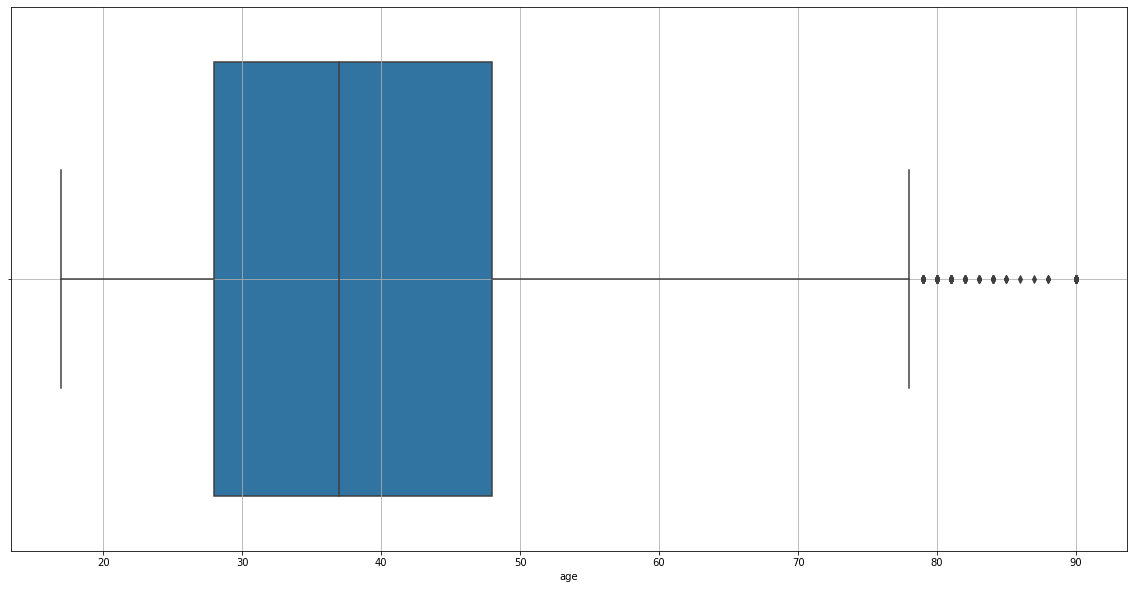

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

We found outliers in our chart, so we'll erase them.

In [62]:
treat_outliers(data=adult_income_prep, column='age', upper=True)

28.0
48.0
20.0


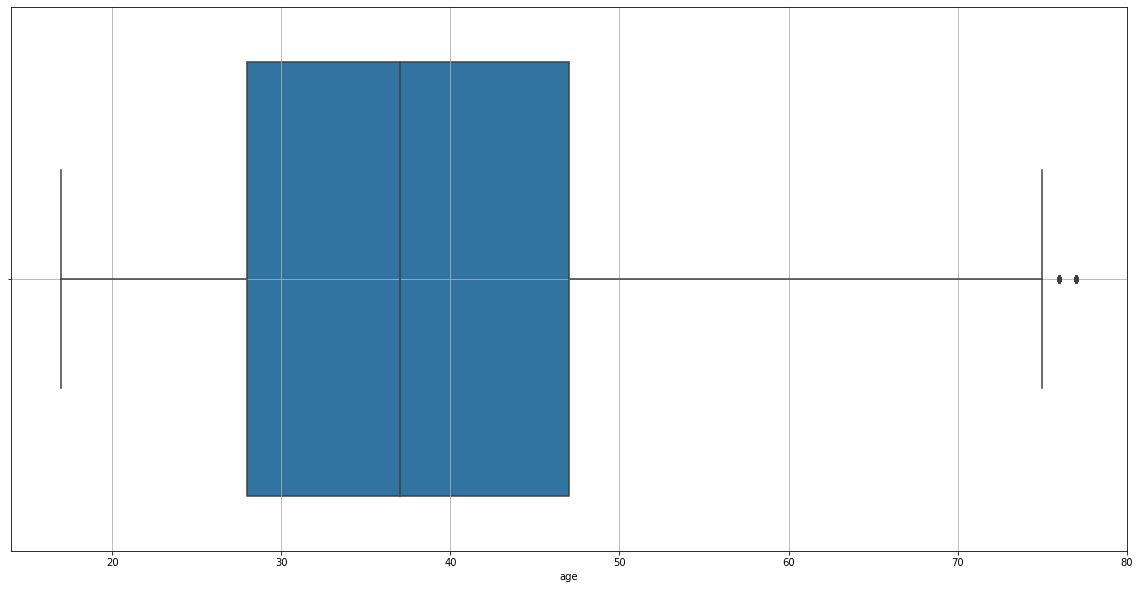

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

In [64]:
treat_outliers(data=adult_income_prep, column='age', upper=True)

28.0
47.0
19.0


Let's check out now

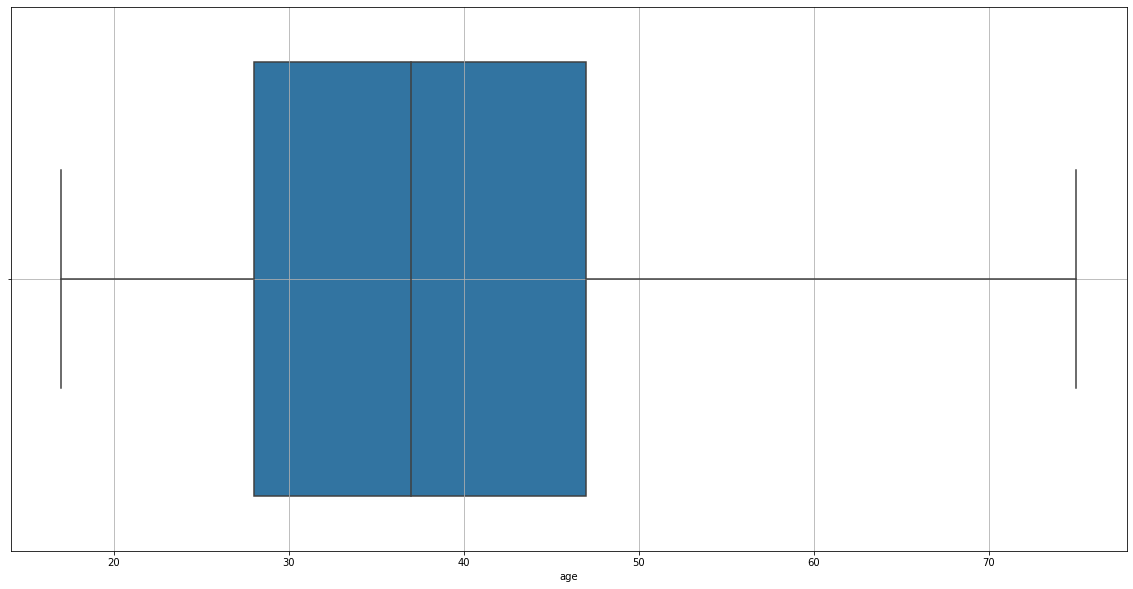

In [65]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

There are still to rows which age column contains an outlier.

In [66]:
treat_outliers(data=adult_income_prep, column='age', upper=True)

28.0
47.0
19.0


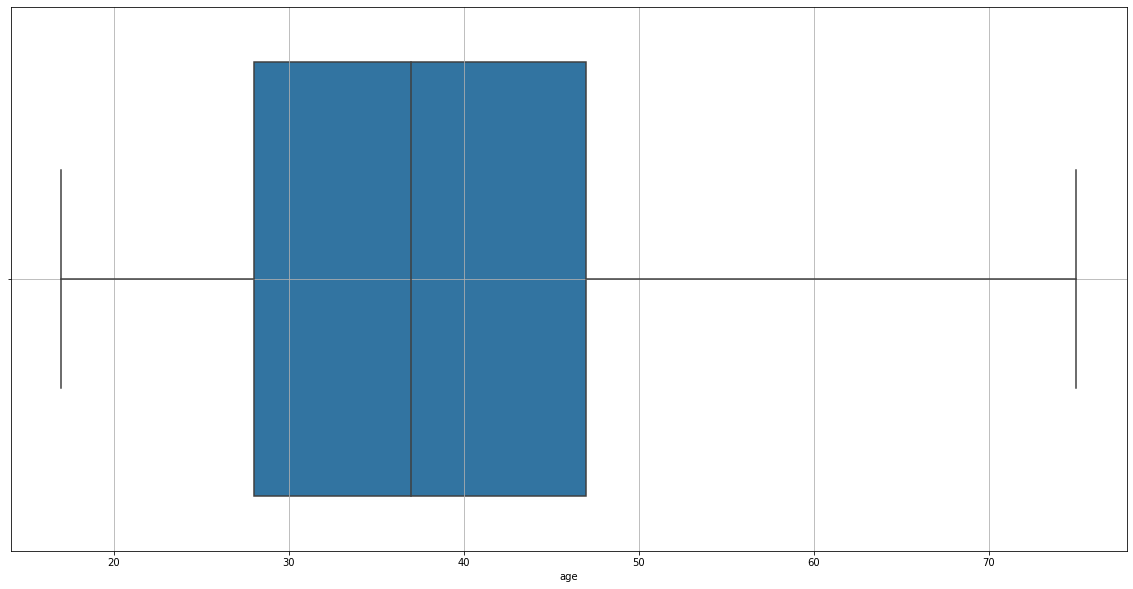

In [67]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

Now it's OK.

#### Removing outliers of final Weight 

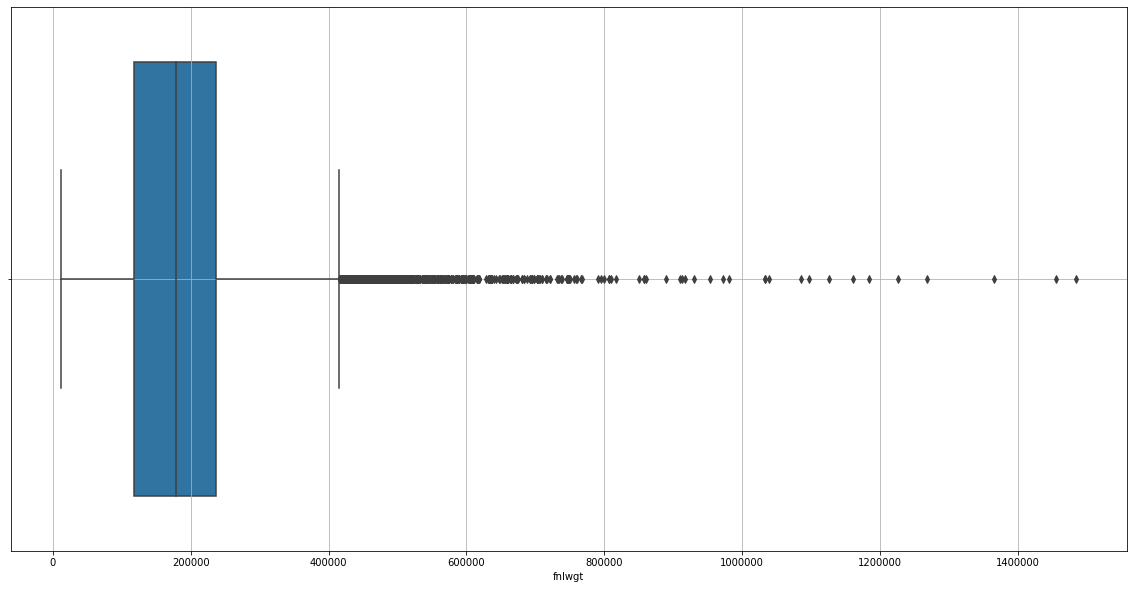

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['fnlwgt'])
plt.grid()

In [69]:
treat_outliers(data=adult_income_prep, column='fnlwgt', upper=True)


117827.0
237051.0
119224.0


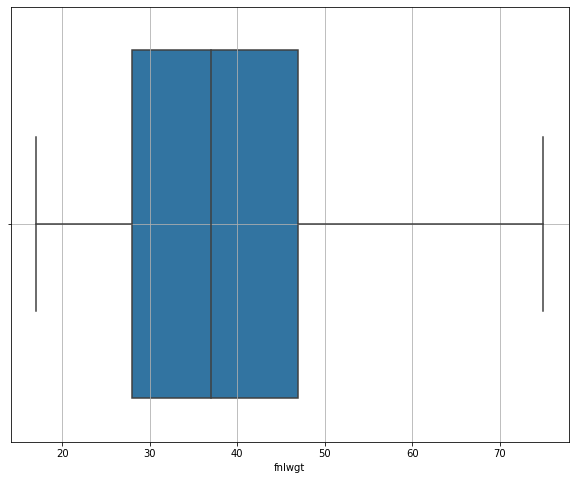

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['fnlwgt'])
plt.grid()

#### Checking outliers in Capital Gain and Loss

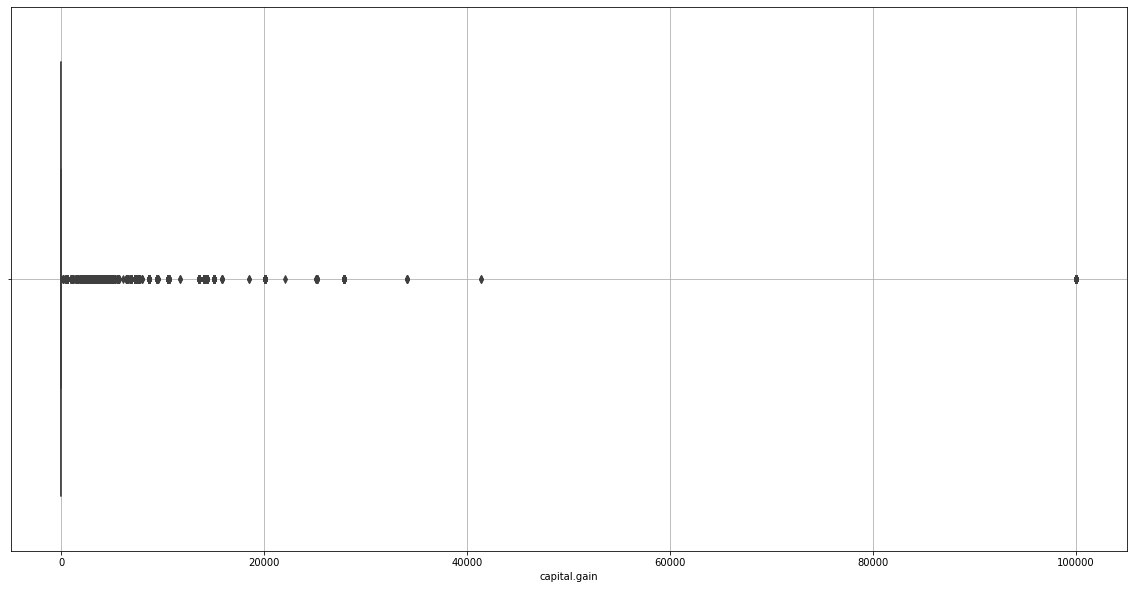

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['capital.gain'])
plt.grid()

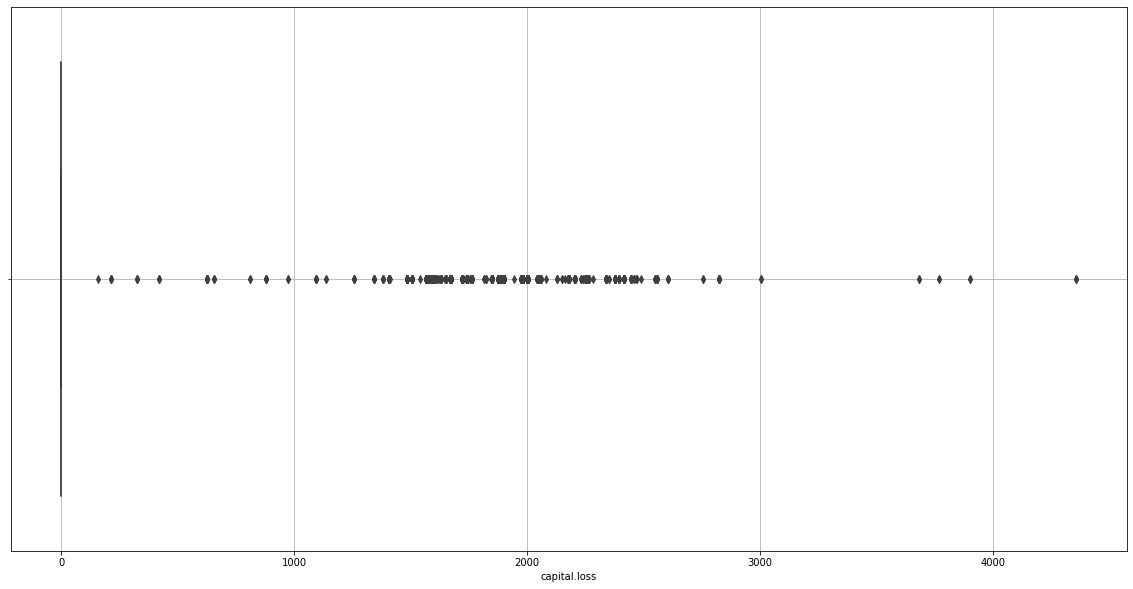

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['capital.loss'])
plt.grid()

We realize `capital.gain` and `capital.loss` will disturb our learning process as they don't give any useful information either.

In [73]:
adult_income_prep = adult_income_prep.drop(columns=['capital.gain', 'capital.loss'])

#### Checking outliers of Hours per week

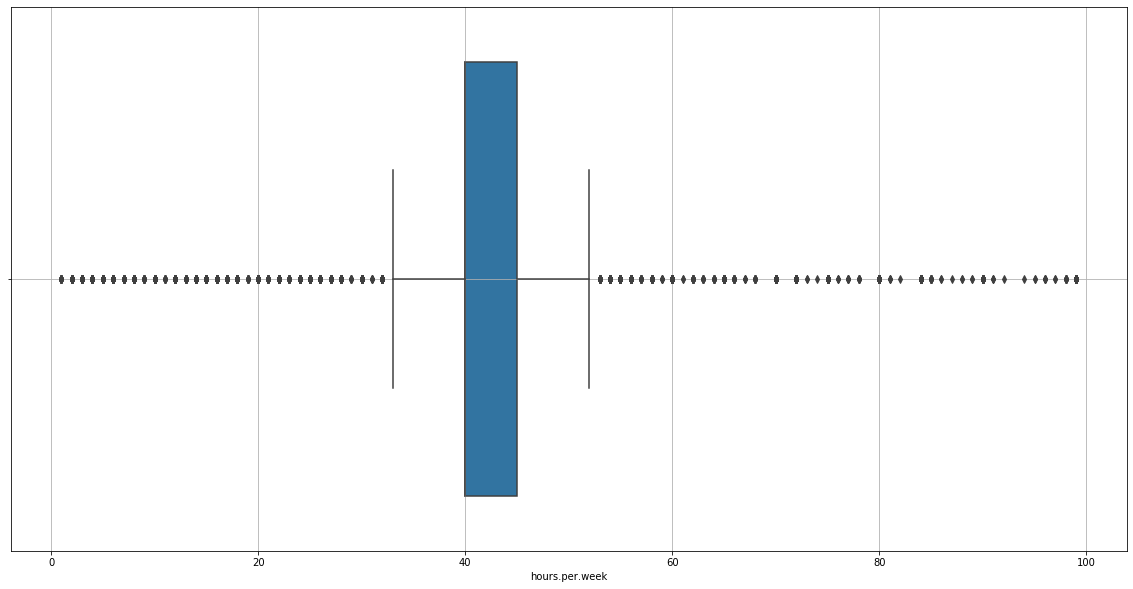

In [74]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['hours.per.week'])
plt.grid()

There are outliers, we must remove them.

In [75]:
treat_outliers(data=adult_income_prep, column='hours.per.week', upper=True, lower=True)

40.0
45.0
5.0


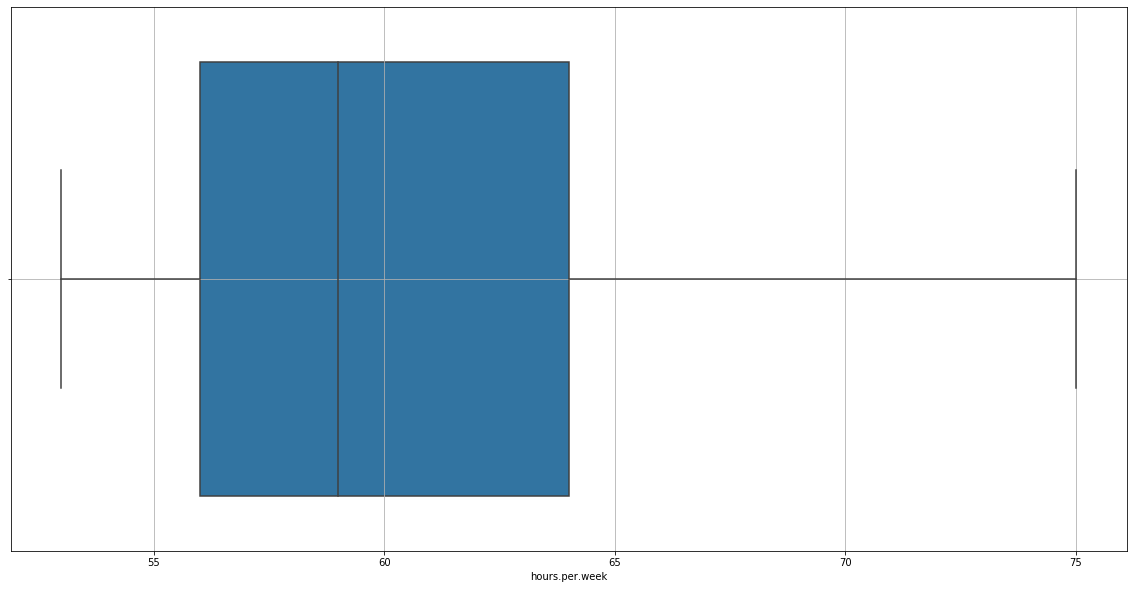

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['hours.per.week'])
plt.grid()

Now it's alright. Let's see how our dataset is now.

In [77]:
adult_income_prep.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,NaN,Unknown,NaN,HS-grad,9,Widowed,Other,Not-in-family,White,Female,NaN,United-States,<=50K
1,NaN,Private,NaN,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,United-States,<=50K
2,66,Unknown,66,Some-college,10,Widowed,Other,Unmarried,Black,Female,66,United-States,<=50K
3,54,Private,54,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,54,United-States,<=50K
4,41,Private,41,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,NaN,United-States,<=50K


We found new null values in the `age` and `fnlwgt` column. We have to fill it the median value.

In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [79]:
adult_income_num = adult_income_prep[['age', 'fnlwgt', 'hours.per.week']]

In [80]:
adult_income_num.head()

,age,fnlwgt,hours.per.week
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,66,66,66
3,54,54,54
4,41,41,NaN


In [81]:
imputer.fit(adult_income_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [82]:
imputer.statistics_

array([37., 37., 59.])

In [83]:
X = imputer.transform(adult_income_num)

In [84]:
X

array([[37., 37., 59.],
       [37., 37., 59.],
       [66., 66., 66.],
       ...,
       [40., 40., 59.],
       [58., 58., 58.],
       [22., 22., 59.]])

In [85]:
adult_tr = pd.DataFrame(X, columns=adult_income_num.columns)

In [86]:
adult_tr

,age,fnlwgt,hours.per.week
0,37.0,37.0,59.0
1,37.0,37.0,59.0
2,66.0,66.0,66.0
3,54.0,54.0,54.0
4,41.0,41.0,59.0
...,...,...,...
32556,22.0,22.0,59.0
32557,27.0,27.0,59.0
32558,40.0,40.0,59.0
32559,58.0,58.0,58.0


In [87]:
adult_income_prep['age'] = adult_tr['age']
adult_income_prep['fnlwgt'] = adult_tr['fnlwgt']
adult_income_prep['hours.per.week'] = adult_tr['hours.per.week']

In [88]:
adult_income_prep.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,37.0,Unknown,37.0,HS-grad,9,Widowed,Other,Not-in-family,White,Female,59.0,United-States,<=50K
1,37.0,Private,37.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,59.0,United-States,<=50K
2,66.0,Unknown,66.0,Some-college,10,Widowed,Other,Unmarried,Black,Female,66.0,United-States,<=50K
3,54.0,Private,54.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,54.0,United-States,<=50K
4,41.0,Private,41.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,59.0,United-States,<=50K


Alright, no null values now. Now let's change the income values by 1 and 0.

In [89]:
adult_income_prep['income'] = adult_income_prep['income'].replace('<=50K', 0)
adult_income_prep['income'] = adult_income_prep['income'].replace('>50K', 1)

We'll erase the `education` feature because it's the same as `education.num`.

In [90]:
adult_income_prep = adult_income_prep.drop(columns='education')

#### Category Encoding

During our learning process, we can use non-numerical values, so it's better to encode our non-numerical features.

In [91]:
adult_income_prep.workclass = adult_income_prep.workclass.astype('category').cat.codes
adult_income_prep['marital.status'] = adult_income_prep['marital.status'].astype('category').cat.codes
adult_income_prep['occupation'] = adult_income_prep['occupation'].astype('category').cat.codes
adult_income_prep['relationship'] = adult_income_prep['relationship'].astype('category').cat.codes
adult_income_prep['race'] = adult_income_prep['race'].astype('category').cat.codes
adult_income_prep['sex'] = adult_income_prep['sex'].astype('category').cat.codes
adult_income_prep['native.country'] = adult_income_prep['native.country'].astype('category').cat.codes

In [92]:
adult_income_prep.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,37.0,7,37.0,9,6,7,1,4,0,59.0,39,0
1,37.0,3,37.0,9,6,3,1,4,0,59.0,39,0
2,66.0,7,66.0,10,6,7,4,2,0,66.0,39,0
3,54.0,3,54.0,4,0,6,4,4,0,54.0,39,0
4,41.0,3,41.0,10,5,10,3,4,0,59.0,39,0


Now our dataset is ready for training.

# Training and Comparing models

In [93]:
np.random.seed(1234)

We prepare out dataset and divide it into subsets.

In [94]:
y = adult_income_prep['income']
X_prepared = adult_income_prep.drop(columns='income')


We import the `sklearn` library we need to partition the dataset into training and testing subsets.

In [95]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_prepared, y, random_state = 0)

We will use a crossvalidation to search for the best hyperparameters.

In [96]:
from sklearn.model_selection import cross_val_score

We'll have to dictionaries containing the Mean Absolute Error and the accuracy value of each algorithm.

In [97]:
MAE = dict()
Acc = dict()

## Traditional ML Techniques: Logistic regression

We will perform a crossvalidated logistic regression to our dataset. From the Logistic Regression we will extract the coeficients/features who have a better or a worse influence on the prediction.

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
log_model = LogisticRegression()

In [100]:
score = cross_val_score(log_model, X_prepared, y, scoring="neg_mean_absolute_error", cv=10)

/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [101]:
print("MAE score mean:\n", np.abs(score).mean())

MAE score mean:
 0.1939743749806691


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = [
    {'C': [0.001,0.01,0.1,1,10,100]},
]
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [104]:
grid_search.best_params_

{'C': 100}

In [105]:
log_model = LogisticRegression(C=100, random_state=0)

In [106]:
log_model.fit(train_X, train_y)

/Users/morad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
val_predictions = log_model.predict(val_X)

In [108]:
columns = adult_income_prep.drop(columns='income').columns
coefs = log_model.coef_[0]
print("Features - Coefs")
for index in range(len(coefs)):
    print(columns[index], ":", coefs[index])
    

Features - Coefs
age : 0.0591988304177485
workclass : -0.09002223884698841
fnlwgt : -0.014278177489885961
education.num : 0.37357447044203884
marital.status : -0.21856029678303646
occupation : -7.447641781696112e-05
relationship : -0.14266599757140028
race : 0.13047846851261513
sex : 1.0391318172666453
hours.per.week : -0.12302044432859731
native.country : 0.001667892121472329


It's pretty interesting to see what the logistic regression reveals.
* Education, relationship, gender and race are the features which most positively have an impact on income
* The hours per week and the final weight have a negative impact on income

Now, let's calculate the mean absolute error (MAE).

In [109]:
from sklearn.metrics import mean_absolute_error
lm_mae = mean_absolute_error(val_y, val_predictions)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
lm_acc = accuracy_score(val_y, val_predictions)
MAE['lm'] = lm_mae
Acc['lm'] = lm_acc

In [112]:
print("The mae is", lm_mae)

The mae is 0.19395651639847686


In [113]:
print("The accuracy is", lm_acc * 100, "%")

The accuracy is 80.60434836015231 %


## Modern ML techniques

We've performed a training and testing process using a traditional ML technique which was the Logistic Regression. Now, we'll use some modern classifers which are:
* Random Forests
* K Nearest Neighbours
* Gradient Boosting Machine
* Naive Bayes

For all of them we'll perform a crossvaliation to detect the best hyperparameters. 

### Random Forests

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_model = RandomForestClassifier()
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [117]:
rf_model = RandomForestClassifier(max_features=2, n_estimators=30, random_state=0)

In [118]:
rf_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [119]:
val_predictions = rf_model.predict(val_X)

In [120]:
rf_mae = mean_absolute_error(val_y, val_predictions)

In [121]:
rf_mae

0.18634074438029727

In [122]:
rf_acc = accuracy_score(val_y, val_predictions)

In [123]:
rf_acc

0.8136592556197028

In [124]:
MAE['rf'] = rf_mae
Acc['rf'] = rf_acc

### Gradient Boosting Machine

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gbm_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=0)

param_grid = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
        

In [127]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 800}

In [128]:
gbm_model = GradientBoostingClassifier(max_depth=7, min_samples_split=800, random_state=0)

In [129]:
gbm_mae = mean_absolute_error(val_y, val_predictions)

In [130]:
gbm_mae

0.18634074438029727

In [131]:
gbm_acc = accuracy_score(val_y, val_predictions)

In [132]:
gbm_acc

0.8136592556197028

In [133]:
MAE['gbm'] = gbm_mae
Acc['gbm'] = gbm_acc

### K-Nearest Neighbours

In [134]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [135]:
KNN

sklearn.neighbors._classification.KNeighborsClassifier

In [136]:
knn_model = KNN()

param_grid = {'n_neighbors':range(5,10,1)}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(5, 10)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [137]:
knn_params = grid_search.best_params_
knn_params

{'n_neighbors': 8}

In [138]:
knn_model = KNN(n_neighbors=8)

In [139]:
knn_model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [140]:
val_predictions = knn_model.predict(val_X)

In [141]:
knn_mae = mean_absolute_error(val_y, val_predictions)

In [142]:
knn_mae

0.18769192973836138

In [143]:
knn_acc = accuracy_score(val_y, val_predictions)

In [144]:
knn_acc

0.8123080702616386

### Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB

In [146]:
GNB = GaussianNB()

In [147]:
GNB.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
val_predictions = GNB.predict(val_X)

In [149]:
GNB_mae = mean_absolute_error(val_y, val_predictions)

In [150]:
GNB_mae

0.22012037833190026

In [151]:
GNB_acc = accuracy_score(val_y, val_predictions)

In [152]:
GNB_acc

0.7798796216680998

In [153]:
MAE['gnb'] = GNB_mae
Acc['gnb'] = GNB_acc

In [154]:
MAE['knn'] = knn_mae
Acc['knn'] = knn_acc

Text(0.5, 1.0, 'Accuracy score')

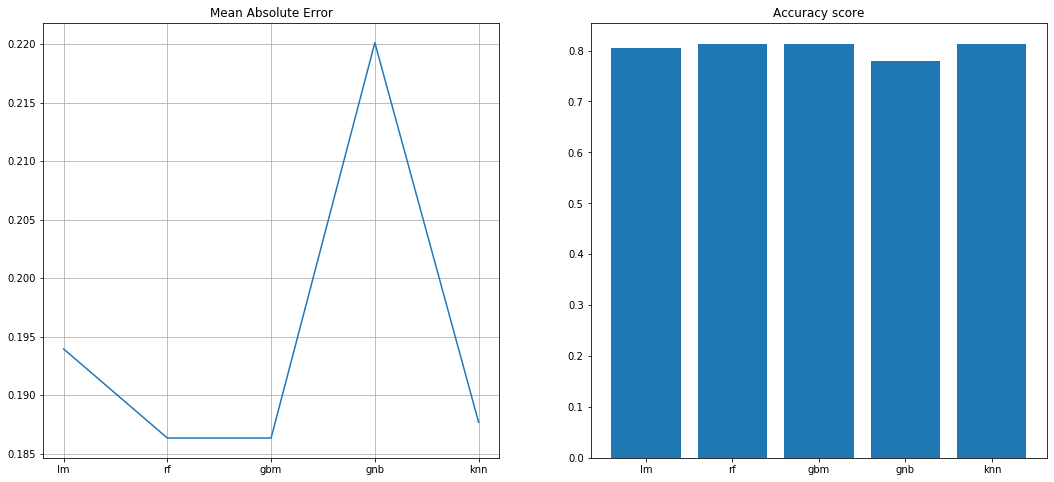

In [155]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].plot(list(MAE.keys()), list(MAE.values()))
ax[0].set_title("Mean Absolute Error")
ax[0].grid()
ax[1].bar(list(Acc.keys()), list(Acc.values()))
ax[1].set_title("Accuracy score")

Apparently the Random Forest Classifier is the best compared to the rest due the time Gradient Boosting needs to perform the training and testing with a 81.36% accuracy. 